In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('../../../DATASET/Iris.csv')

<IPython.core.display.Javascript object>

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df = df.iloc[:,1:]

In [12]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [14]:
df['Species'] = encoder.fit_transform(df['Species'])

In [16]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


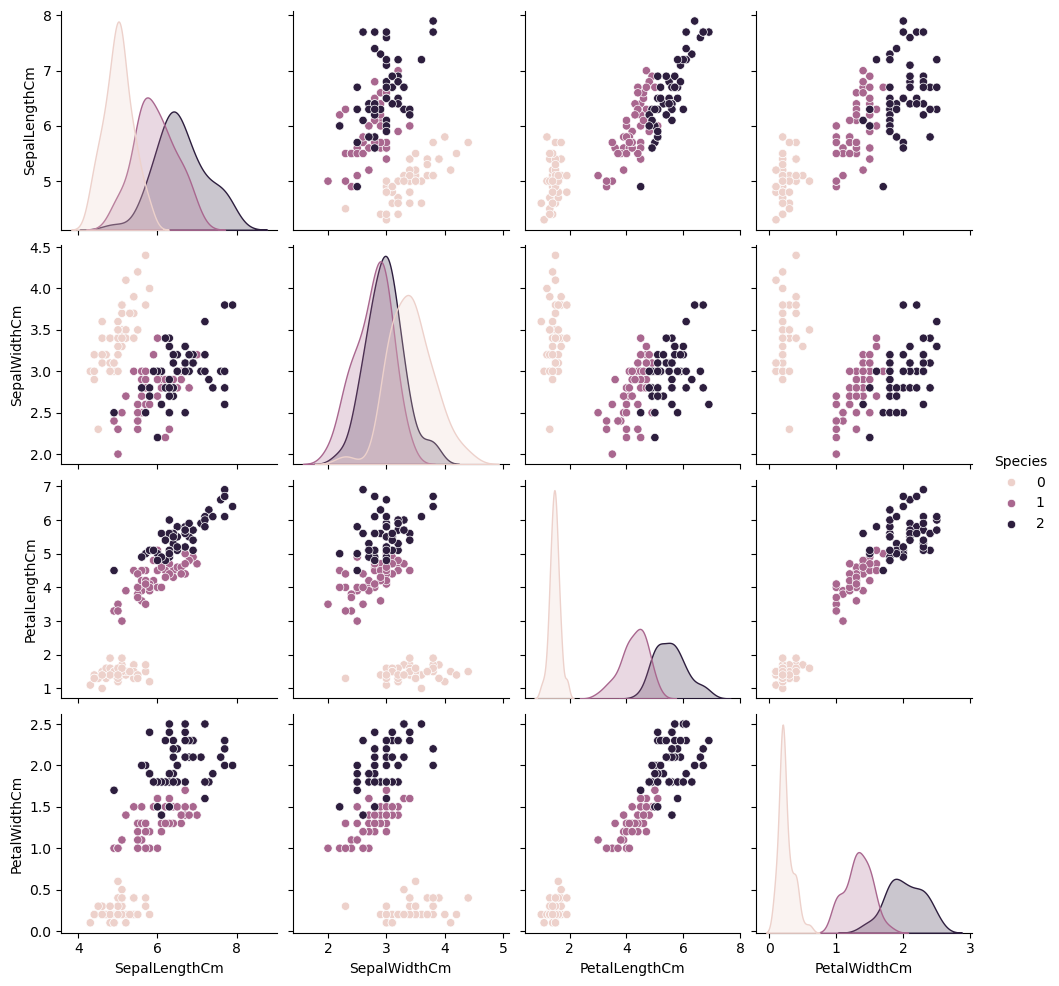

In [15]:
import seaborn as sns
sns.pairplot(df,hue='Species')

In [59]:
# we are taking only sepal length and sepal width and ignoring setosa flowers marked as class 0 

In [18]:
new_df = df[df['Species'] != 0][['SepalLengthCm','SepalWidthCm','Species']]

In [19]:
new_df.head()

,SepalLengthCm,SepalWidthCm,Species
50,7.0,3.2,1
51,6.4,3.2,1
52,6.9,3.1,1
53,5.5,2.3,1
54,6.5,2.8,1


In [20]:
new_df.shape

(100, 3)

In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [23]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [24]:
estimators = [('lr',clf1) , ('rf',clf2) , ('knn',clf3)]

In [25]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

lr 0.81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

rf 0.72


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

knn 0.76


In [26]:
from sklearn.ensemble import VotingClassifier

## HARD VOTING

In [27]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.77


## SOFT VOTING

In [28]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.77


## Weightage Voting

In [29]:
for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={} , j={} , k={}".format(i,j,k),np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=1 , k=1 0.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=1 , k=2 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=1 , k=3 0.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=2 , k=1 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=2 , k=2 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=2 , k=3 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=3 , k=1 0.74


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=3 , k=2 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=1 , j=3 , k=3 0.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=1 , k=1 0.78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=1 , k=2 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=1 , k=3 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=2 , k=1 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=2 , k=2 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=2 , k=3 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=3 , k=1 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=3 , k=2 0.76


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=2 , j=3 , k=3 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=1 , k=1 0.8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=1 , k=2 0.79


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=1 , k=3 0.78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=2 , k=1 0.78


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=2 , k=2 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=2 , k=3 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=3 , k=1 0.75


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=3 , k=2 0.77


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

for i=3 , j=3 , k=3 0.77


## Classifiers of Same Algo

In [75]:
# There are cases where we need to train hyperparameter the model to find the optimal output

In [30]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [31]:
X , y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)

svm1 = SVC(probability=True , kernel='poly' , degree=1)
svm2 = SVC(probability=True , kernel='poly' , degree=2)
svm3 = SVC(probability=True , kernel='poly' , degree=3)
svm4 = SVC(probability=True , kernel='poly' , degree=4)
svm5 = SVC(probability=True , kernel='poly' , degree=5)

estimators = [('svm1',svm1) , ('svm2',svm2) , ('svm3',svm3) , ('svm4',svm4) , ('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

svm1 0.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

svm2 0.85


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

svm3 0.89


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

svm4 0.81


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

svm5 0.86


In [ ]:
# As svm3 is giving maximum accuracy we could have choosen it but instead well use voting classifier which 
# will give even better result

In [32]:
vc1 = VotingClassifier(estimators=estimators , voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.93
